In [1]:
#install python (and check the add to path option during installation), then install the ema_workbench python module.
#this can be done by executing the following command in the command prompt:
# pip install ema_workbench

#import necessary python libraries for the analysis
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

#import EMA workbench tools
from ema_workbench.em_framework import samplers, evaluators, util
from ema_workbench import (RealParameter, ScalarOutcome, Model, Constant)
from ema_workbench import (perform_experiments, ema_logging, save_results, 
                           load_results, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)


#import PRIM algorithm
from ema_workbench.analysis import prim

C:\Users\Timme\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Timme\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
# read the benefits data gathered from the literature
b = pd.read_csv("Sample_benefit_data.csv")
display(b)

# read the costs and benefits data gathered from the literature
c = pd.read_csv("Sample_cost_data.csv")
c

,Item,0,1,2,3,4,5,6,7,8
0,UHIE_mitigation,0.010000,0.030000,0.040000,0.200000,1.000000,0.040000,0.010000,0.020000,0.050000
1,AQ_reduction,0.004500,0.013500,0.018000,0.090000,0.450000,0.018000,0.004500,0.009000,0.022500
2,AQ_reduction,0.002025,0.006075,0.008100,0.040500,0.202500,0.008100,0.002025,0.004050,0.010125
3,UHIE_mitigation,0.000911,0.002734,0.003645,0.018225,0.091125,0.003645,0.000911,0.001823,0.004556
4,UHIE_mitigation,0.000410,0.001230,0.001640,0.008201,0.041006,0.001640,0.000410,0.000820,0.002050
5,B_enhancement,0.000185,0.000554,0.000738,0.003691,0.018453,0.000738,0.000185,0.000369,0.000923
6,B_enhancement,0.000083,0.000249,0.000332,0.001661,0.008304,0.000332,0.000083,0.000166,0.000415
7,B_enhancement,0.000037,0.000112,0.000149,0.000747,0.003737,0.000149,0.000037,0.000075,0.000187


,Item,0,1,2,3,4,5,6,7,8
0,Installation,10,0,0,0,0,0,0,0,0
1,Installation,9,0,0,0,0,0,0,0,0
2,Maintenance,0,0,5,0,0,5,0,0,5
3,Maintenance,0,2,2,2,2,2,2,2,2


In [3]:
# column_names = [ i for i in range(len(cb.columns)-1) ]
# column_names.insert(0,"Benefit")
# summary_cb = pd.DataFrame(columns = column_names)
# summary_cb


# cb[ cb["Benefit"]== str("UHIE_mitigation") ].describe()

In [4]:
# generate a multi-index dataframe summary statistics for each cost and benefit in the literature

# the multi-index dataframe will be created from a dictionary of string-dataframe pairs, whereby the string
# is the name of the benefit or cost, and the df contains the summary statistics for its yearly monetary values
dict_dataframes = dict()
for item in b["Item"].unique():
    dict_dataframes[item] = b[ b["Item"]== str(item) ].describe()

b_summary = pd.concat(dict_dataframes, axis = 0)
display(b_summary)


# the same is done for costs
dict_dataframes = dict()
for item in c["Item"].unique():
    dict_dataframes[item] = c[ c["Item"]== str(item) ].describe()

c_summary = pd.concat(dict_dataframes, axis = 0)
display(c_summary)

0         1         2         3         4  \
UHIE_mitigation count  3.000000  3.000000  3.000000  3.000000  3.000000   
                mean   0.003774  0.011321  0.015095  0.075475  0.377377   
                std    0.005398  0.016194  0.021592  0.107958  0.539789   
                min    0.000410  0.001230  0.001640  0.008201  0.041006   
                25%    0.000661  0.001982  0.002643  0.013213  0.066066   
                50%    0.000911  0.002734  0.003645  0.018225  0.091125   
                75%    0.005456  0.016367  0.021823  0.109113  0.545562   
                max    0.010000  0.030000  0.040000  0.200000  1.000000   
AQ_reduction    count  2.000000  2.000000  2.000000  2.000000  2.000000   
                mean   0.003262  0.009787  0.013050  0.065250  0.326250   
                std    0.001750  0.005250  0.007000  0.035002  0.175009   
                min    0.002025  0.006075  0.008100  0.040500  0.202500   
                25%    0.002644  0.007931  0.010575  0.052875  0.264375   
                50%    0.003262  0.009787  0.013050  0.065250  0.326250   
                75%    0.003881  0.011644  0.015525  0.077625  0.388125   
                max    0.004500  0.013500  0.018000  0.090000  0.450000   
B_enhancement   count  3.000000  3.000000  3.000000  3.000000  3.000000   
                mean   0.000102  0.000305  0.000407  0.002033  0.010164   
                std    0.000075  0.000226  0.000301  0.001506  0.007532   
                min    0.000037  0.000112  0.000149  0.000747  0.003737   
                25%    0.000060  0.000181  0.000241  0.001204  0.006020   
                50%    0.000083  0.000249  0.000332  0.001661  0.008304   
                75%    0.000134  0.000401  0.000535  0.002676  0.013378   
                max    0.000185  0.000554  0.000738  0.003691  0.018453   

                              5         6         7         8  
UHIE_mitigation count  3.000000  3.000000  3.000000  3.000000  
                mean   0.015095  0.003774  0.007548  0.018869  
                std    0.021592  0.005398  0.010796  0.026989  
                min    0.001640  0.000410  0.000820  0.002050  
                25%    0.002643  0.000661  0.001321  0.003303  
                50%    0.003645  0.000911  0.001823  0.004556  
                75%    0.021823  0.005456  0.010911  0.027278  
                max    0.040000  0.010000  0.020000  0.050000  
AQ_reduction    count  2.000000  2.000000  2.000000  2.000000  
                mean   0.013050  0.003262  0.006525  0.016313  
                std    0.007000  0.001750  0.003500  0.008750  
                min    0.008100  0.002025  0.004050  0.010125  
                25%    0.010575  0.002644  0.005288  0.013219  
                50%    0.013050  0.003262  0.006525  0.016313  
                75%    0.015525  0.003881  0.007763  0.019406  
                max    0.018000  0.004500  0.009000  0.022500  
B_enhancement   count  3.000000  3.000000  3.000000  3.000000  
                mean   0.000407  0.000102  0.000203  0.000508  
                std    0.000301  0.000075  0.000151  0.000377  
                min    0.000149  0.000037  0.000075  0.000187  
                25%    0.000241  0.000060  0.000120  0.000301  
                50%    0.000332  0.000083  0.000166  0.000415  
                75%    0.000535  0.000134  0.000268  0.000669  
                max    0.000738  0.000185  0.000369  0.000923

0         1        2         3         4        5  \
Installation count   2.000000  2.000000  2.00000  2.000000  2.000000  2.00000   
             mean    9.500000  0.000000  0.00000  0.000000  0.000000  0.00000   
             std     0.707107  0.000000  0.00000  0.000000  0.000000  0.00000   
             min     9.000000  0.000000  0.00000  0.000000  0.000000  0.00000   
             25%     9.250000  0.000000  0.00000  0.000000  0.000000  0.00000   
             50%     9.500000  0.000000  0.00000  0.000000  0.000000  0.00000   
             75%     9.750000  0.000000  0.00000  0.000000  0.000000  0.00000   
             max    10.000000  0.000000  0.00000  0.000000  0.000000  0.00000   
Maintenance  count   2.000000  2.000000  2.00000  2.000000  2.000000  2.00000   
             mean    0.000000  1.000000  3.50000  1.000000  1.000000  3.50000   
             std     0.000000  1.414214  2.12132  1.414214  1.414214  2.12132   
             min     0.000000  0.000000  2.00000  0.000000  0.000000  2.00000   
             25%     0.000000  0.500000  2.75000  0.500000  0.500000  2.75000   
             50%     0.000000  1.000000  3.50000  1.000000  1.000000  3.50000   
             75%     0.000000  1.500000  4.25000  1.500000  1.500000  4.25000   
             max     0.000000  2.000000  5.00000  2.000000  2.000000  5.00000   

                           6         7        8  
Installation count  2.000000  2.000000  2.00000  
             mean   0.000000  0.000000  0.00000  
             std    0.000000  0.000000  0.00000  
             min    0.000000  0.000000  0.00000  
             25%    0.000000  0.000000  0.00000  
             50%    0.000000  0.000000  0.00000  
             75%    0.000000  0.000000  0.00000  
             max    0.000000  0.000000  0.00000  
Maintenance  count  2.000000  2.000000  2.00000  
             mean   1.000000  1.000000  3.50000  
             std    1.414214  1.414214  2.12132  
             min    0.000000  0.000000  2.00000  
             25%    0.500000  0.500000  2.75000  
             50%    1.000000  1.000000  3.50000  
             75%    1.500000  1.500000  4.25000  
             max    2.000000  2.000000  5.00000

In [5]:
# only select the summary statistics of interest
idx = pd.IndexSlice
b_ranges = b_summary.loc[idx[:, ["min", "mean", "max"]], :]
c_ranges = c_summary.loc[idx[:, ["min", "mean", "max"]], :]

display(b_ranges)
display(c_ranges)

# a single dataframe containing both benefits and costs' summary statistics is generated 
bc_ranges = b_ranges.append(c_ranges)
display(bc_ranges)

0         1         2         3         4  \
UHIE_mitigation mean  0.003774  0.011321  0.015095  0.075475  0.377377   
                min   0.000410  0.001230  0.001640  0.008201  0.041006   
                max   0.010000  0.030000  0.040000  0.200000  1.000000   
AQ_reduction    mean  0.003262  0.009787  0.013050  0.065250  0.326250   
                min   0.002025  0.006075  0.008100  0.040500  0.202500   
                max   0.004500  0.013500  0.018000  0.090000  0.450000   
B_enhancement   mean  0.000102  0.000305  0.000407  0.002033  0.010164   
                min   0.000037  0.000112  0.000149  0.000747  0.003737   
                max   0.000185  0.000554  0.000738  0.003691  0.018453   

                             5         6         7         8  
UHIE_mitigation mean  0.015095  0.003774  0.007548  0.018869  
                min   0.001640  0.000410  0.000820  0.002050  
                max   0.040000  0.010000  0.020000  0.050000  
AQ_reduction    mean  0.013050  0.003262  0.006525  0.016313  
                min   0.008100  0.002025  0.004050  0.010125  
                max   0.018000  0.004500  0.009000  0.022500  
B_enhancement   mean  0.000407  0.000102  0.000203  0.000508  
                min   0.000149  0.000037  0.000075  0.000187  
                max   0.000738  0.000185  0.000369  0.000923

0    1    2    3    4    5    6    7    8
Installation mean   9.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
             min    9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
             max   10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Maintenance  mean   0.0  1.0  3.5  1.0  1.0  3.5  1.0  1.0  3.5
             min    0.0  0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0
             max    0.0  2.0  5.0  2.0  2.0  5.0  2.0  2.0  5.0

0         1         2         3         4  \
UHIE_mitigation mean   0.003774  0.011321  0.015095  0.075475  0.377377   
                min    0.000410  0.001230  0.001640  0.008201  0.041006   
                max    0.010000  0.030000  0.040000  0.200000  1.000000   
AQ_reduction    mean   0.003262  0.009787  0.013050  0.065250  0.326250   
                min    0.002025  0.006075  0.008100  0.040500  0.202500   
                max    0.004500  0.013500  0.018000  0.090000  0.450000   
B_enhancement   mean   0.000102  0.000305  0.000407  0.002033  0.010164   
                min    0.000037  0.000112  0.000149  0.000747  0.003737   
                max    0.000185  0.000554  0.000738  0.003691  0.018453   
Installation    mean   9.500000  0.000000  0.000000  0.000000  0.000000   
                min    9.000000  0.000000  0.000000  0.000000  0.000000   
                max   10.000000  0.000000  0.000000  0.000000  0.000000   
Maintenance     mean   0.000000  1.000000  3.500000  1.000000  1.000000   
                min    0.000000  0.000000  2.000000  0.000000  0.000000   
                max    0.000000  2.000000  5.000000  2.000000  2.000000   

                             5         6         7         8  
UHIE_mitigation mean  0.015095  0.003774  0.007548  0.018869  
                min   0.001640  0.000410  0.000820  0.002050  
                max   0.040000  0.010000  0.020000  0.050000  
AQ_reduction    mean  0.013050  0.003262  0.006525  0.016313  
                min   0.008100  0.002025  0.004050  0.010125  
                max   0.018000  0.004500  0.009000  0.022500  
B_enhancement   mean  0.000407  0.000102  0.000203  0.000508  
                min   0.000149  0.000037  0.000075  0.000187  
                max   0.000738  0.000185  0.000369  0.000923  
Installation    mean  0.000000  0.000000  0.000000  0.000000  
                min   0.000000  0.000000  0.000000  0.000000  
                max   0.000000  0.000000  0.000000  0.000000  
Maintenance     mean  3.500000  1.000000  1.000000  3.500000  
                min   2.000000  0.000000  0.000000  2.000000  
                max   5.000000  2.000000  2.000000  5.000000

In [6]:
# only select the summary statistics of interest for benefits, one by one

means = dict()
# for each recorded benefit
for item in summary_b.unstack().index:
    
    # take mean values across years, they will represent the standard values in the CBA
    means[item] = summary_b.loc[(item, "mean"), :]
    
    # for each year of the CBA's time horizon
    for col in summary_b.columns:
        
        # extract the min and max values in the literature
        minimum = summary_b.loc[(item, "min"), col]
        maximum = summary_b.loc[(item, "max"), col]
        
        print(item, col, minimum, maximum)
        
b_base = pd.DataFrame(means)
b_base

NameError: name 'summary_b' is not defined

In [7]:
# only select the summary statistics of interest for costs, one by one

means = dict()
# for each recorded benefit
for item in summary_c.unstack().index:
    
    # take mean values across years, they will represent the standard values in the CBA
    means[item] = summary_c.loc[(item, "mean"), :]
    
    # for each year of the CBA's time horizon
    for col in summary_c.columns:
        
        # extract the min and max values in the literature
        minimum = summary_c.loc[(item, "min"), col]
        maximum = summary_c.loc[(item, "max"), col]
        
        print(item, col, minimum, maximum)
        
c_base = pd.DataFrame(means)
c_base

NameError: name 'summary_c' is not defined

In [8]:
# get the mean benefit and cost values as the standard values to use in the CBA model
b_std_values = b_ranges.loc[idx[:,"mean"],:].droplevel(1)
c_std_values = c_ranges.loc[idx[:,"mean"],:].droplevel(1)

# display(b_std_values)
# display(c_std_values)

# get the min and max cost values
b_min = b_ranges.loc[idx[:,"min"],:].droplevel(1)
b_max = b_ranges.loc[idx[:,"max"],:].droplevel(1)
c_min = c_ranges.loc[idx[:,"min"],:].droplevel(1)
c_max = c_ranges.loc[idx[:,"max"],:].droplevel(1)



display(c_min)
display(c_max)

,0,1,2,3,4,5,6,7,8
Installation,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maintenance,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0


,0,1,2,3,4,5,6,7,8
Installation,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maintenance,0.0,2.0,5.0,2.0,2.0,5.0,2.0,2.0,5.0


In [9]:
cb_dict = dict()
for cost in c_min.index:
    for i in c_min.columns:
        if c_max.loc[cost,str(i)] > c_min.loc[cost,str(i)]:
            cb_dict[cost+"_"+i+"c"] = c_std_values.loc[cost,str(i)]

            
for benefit in b_min.index:
    for i in b_min.columns:
        if b_max.loc[benefit,str(i)] > b_min.loc[benefit,str(i)]:
            cb_dict[benefit+"_"+i+"b"] = b_std_values.loc[benefit,str(i)]

cb_dict

{'Installation_0c': 9.5,
 'Maintenance_1c': 1.0,
 'Maintenance_2c': 3.5,
 'Maintenance_3c': 1.0,
 'Maintenance_4c': 1.0,
 'Maintenance_5c': 3.5,
 'Maintenance_6c': 1.0,
 'Maintenance_7c': 1.0,
 'Maintenance_8c': 3.5,
 'UHIE_mitigation_0b': 0.0037737710000000004,
 'UHIE_mitigation_1b': 0.011321312666666666,
 'UHIE_mitigation_2b': 0.015095083333333335,
 'UHIE_mitigation_3b': 0.07547541666666667,
 'UHIE_mitigation_4b': 0.37737708333333325,
 'UHIE_mitigation_5b': 0.015095083333333335,
 'UHIE_mitigation_6b': 0.0037737710000000004,
 'UHIE_mitigation_7b': 0.007547541666666668,
 'UHIE_mitigation_8b': 0.018868854333333334,
 'AQ_reduction_0b': 0.0032624999999999998,
 'AQ_reduction_1b': 0.0097875,
 'AQ_reduction_2b': 0.01305,
 'AQ_reduction_3b': 0.06525,
 'AQ_reduction_4b': 0.32625000000000004,
 'AQ_reduction_5b': 0.01305,
 'AQ_reduction_6b': 0.0032624999999999998,
 'AQ_reduction_7b': 0.006525,
 'AQ_reduction_8b': 0.0163125,
 'B_enhancement_0b': 0.00010164420000000002,
 'B_enhancement_1b': 0.0003

In [10]:
c_sum = np.zeros(9)
for i in range(9): # iterate through the years until the CBA's time horizon
    for key in costs:
        if str(i) in str(key):
            c_sum[i] += costs[key]
c_sum

NameError: name 'costs' is not defined

In [12]:
# define the CBA model as a function

def cba(time_horizon = 9, 
        r = 3,
        incentive = 0,
        **cb_values):       # a dictionary of all costs and benefits incurred each year
                            # e.g., {UHIE_mitigation_0b: 0.4, Installation_0c: 20, AQ_enhacement_3b: 0.1,...}
    
    # the addendi (one every year) of the npv are calculated for each year within the time horizon
    yearly_npvs = np.zeros(time_horizon)
    yearly_rois = np.zeros(time_horizon)
    
    # for every year, all costs and benefits are agebraically summed up with each other
    cb_sum = np.zeros(time_horizon)
    for t in range(time_horizon):         # iterate through the years until the CBA's time horizon
        for key in cb_values:
            if str(t)+"c" in str(key):    # subtract all dictionary values associated with a cost at year i  
                cb_sum[t] -= cb_values[key]
            elif str(t)+"b" in str(key):    # add all dictionary values associated with a benefit at year i
                cb_sum[t] += cb_values[key]

        if t == 0:
            yearly_npvs[t] = ( cb_sum[t] + incentive ) / (1+r)**t
            yearly_rois[t] = cb_sum[t] / 2
        else:
            yearly_npvs[t] = ( cb_sum[t]) / (1+r)**t

    # and then these addendi are summed up to yield the npv
    npv = np.sum(yearly_npvs)
    roi = np.sum(yearly_rois)
    
    return npv, roi


# cba(**cb_dict)

In [13]:
# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it

# instantiate the model
cba_model = Model('cba', function=cba)
cba_model.time_horizon = 9

# specify the uncertainties
uncertainties = []
for benefit in b_min.index:
    for i in b_min.columns:
        if b_max.loc[benefit,str(i)] > b_min.loc[benefit,str(i)]:
            uncertainties.append(RealParameter(benefit+"_"+i+"b", b_min.loc[benefit,str(i)], b_max.loc[benefit,str(i)]))
        
for cost in c_min.index:
    for i in c_min.columns:
        if c_max.loc[cost,str(i)] > c_min.loc[cost,str(i)]:
            uncertainties.append(RealParameter(cost+"_"+i+"c", c_min.loc[cost,str(i)], c_max.loc[cost,str(i)]))
    
uncertainties.append(RealParameter('r', 3, 5))
cba_model.uncertainties = uncertainties

# set the lever
cba_model.levers = [RealParameter("incentive", 0, 10)]

#specify outcomes 
cba_model.outcomes = [ScalarOutcome('npv'), ScalarOutcome('roi')]

# override some of the defaults of the model
cba_model.constants = [Constant('time_horizon', 9)]

In [ ]:
uncertainties

In [29]:
# generation of experiments (scenario-policy couples)

# generation of scenarios whose values will be sampled
n_scenarios = 1000

with SequentialEvaluator(cba_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios)

display(experiments)
display(outcomes)

[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished


,AQ_reduction_0b,AQ_reduction_1b,AQ_reduction_2b,AQ_reduction_3b,AQ_reduction_4b,AQ_reduction_5b,AQ_reduction_6b,AQ_reduction_7b,AQ_reduction_8b,B_enhancement_0b,...,UHIE_mitigation_4b,UHIE_mitigation_5b,UHIE_mitigation_6b,UHIE_mitigation_7b,UHIE_mitigation_8b,r,incentive,scenario,policy,model
0,0.002524,0.011777,0.017003,0.088342,0.222039,0.014421,0.003501,0.008101,0.011273,0.000180,...,0.565502,0.007433,0.004605,0.008518,0.045680,4.051115,0.971942,160,4,cba
1,0.002570,0.006084,0.014705,0.057752,0.370350,0.015294,0.003971,0.004885,0.021752,0.000167,...,0.676794,0.028318,0.003413,0.012380,0.043253,3.270000,0.971942,161,4,cba
2,0.004425,0.009931,0.016029,0.056702,0.227418,0.016922,0.003786,0.008407,0.015633,0.000184,...,0.087101,0.007703,0.002584,0.002022,0.010724,4.073603,0.971942,162,4,cba
3,0.003977,0.009338,0.012014,0.066007,0.372618,0.011729,0.004256,0.005582,0.019938,0.000114,...,0.151426,0.017130,0.004993,0.012128,0.027250,3.266222,0.971942,163,4,cba
4,0.003488,0.008037,0.014839,0.053525,0.328368,0.013944,0.002596,0.007849,0.015428,0.000063,...,0.921451,0.033323,0.002911,0.002643,0.007254,4.508999,0.971942,164,4,cba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.003789,0.012672,0.017694,0.054540,0.220584,0.017702,0.002706,0.007215,0.014164,0.000087,...,0.250016,0.021682,0.007239,0.014776,0.010463,3.392951,0.971942,1155,4,cba
996,0.002168,0.008296,0.011308,0.073663,0.373230,0.012447,0.003273,0.006031,0.015409,0.000082,...,0.723837,0.027575,0.003277,0.004333,0.029787,3.046525,0.971942,1156,4,cba
997,0.003804,0.006401,0.013046,0.079378,0.279804,0.014827,0.004266,0.007903,0.015711,0.000070,...,0.402146,0.036513,0.000533,0.010388,0.041650,4.835741,0.971942,1157,4,cba
998,0.003149,0.007096,0.009053,0.061235,0.313902,0.009194,0.004433,0.007177,0.014248,0.000067,...,0.770986,0.018957,0.006537,0.011618,0.040773,3.577308,0.971942,1158,4,cba


{'npv': array([-8.51779712, -8.73511645, -8.58462059, -9.13708015, -8.51847032,
        -8.63310533, -9.24314037, -8.85679613, -9.33908381, -8.59284552,
        -9.25977288, -8.61825005, -8.45596113, -8.86308576, -9.0620339 ,
        -9.04766689, -9.35156481, -8.59502163, -8.5969684 , -9.23735706,
        -8.59124692, -9.31973337, -8.43736667, -9.22400918, -8.22465509,
        -8.91240722, -8.63377101, -8.72257132, -8.72401583, -8.76661956,
        -8.8556227 , -8.81966548, -9.08694923, -8.830675  , -9.13848934,
        -8.60065045, -8.5551575 , -8.94249662, -8.62149826, -9.31838997,
        -8.45053765, -9.10381582, -8.18849924, -8.89326207, -8.68997306,
        -9.06619635, -9.22225891, -9.0862795 , -8.7638819 , -8.76698156,
        -9.46790918, -9.27895546, -8.76630342, -8.67693634, -9.1871984 ,
        -8.47882868, -8.53065029, -8.62967131, -8.41116426, -9.09999945,
        -8.93634182, -9.18679837, -8.55060727, -9.53438108, -9.30633128,
        -8.72629418, -8.87600197, -8.7706318

In [46]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes["npv"] > np.percentile(outcomes["npv"], 60)

prim_alg = prim.Prim(x,y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 1000 points remaining, containing 400 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.219, coverage: 0.5475, density: 1.0 restricted_dimensions: 6


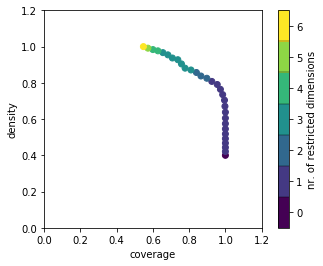

In [47]:
box1.show_tradeoff()
plt.show()

In [48]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.0000,0.400000,0,1.000,0.400000,0
1,1.0000,0.421053,1,0.950,0.421053,1
2,1.0000,0.443459,2,0.902,0.443459,1
3,1.0000,0.467290,3,0.856,0.467290,1
4,1.0000,0.492005,4,0.813,0.492005,1
5,1.0000,0.518135,5,0.772,0.518135,1
6,1.0000,0.545703,6,0.733,0.545703,1
7,1.0000,0.574713,7,0.696,0.574713,1
8,1.0000,0.605144,8,0.661,0.605144,1
9,1.0000,0.637959,9,0.627,0.637959,1


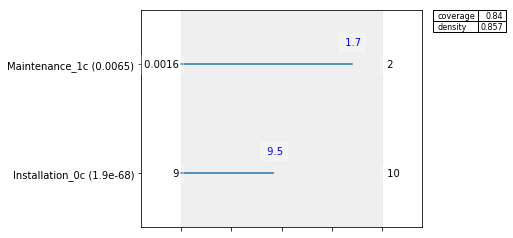

In [49]:
fig = box1.inspect(18,style='graph')
plt.show()

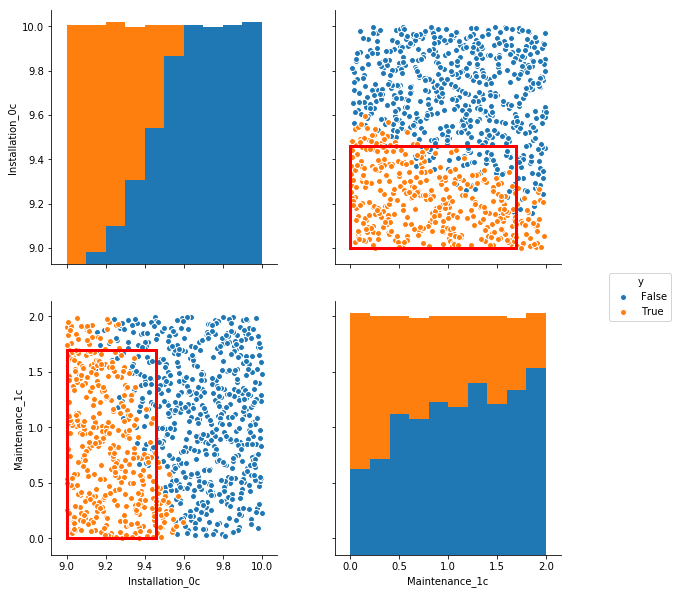

In [50]:
box1.show_pairs_scatter(18).fig.set_size_inches(10,9)
# plt.savefig("./Graphs/Prim_Scenario_Discovery_670_samples")
plt.show(18)

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


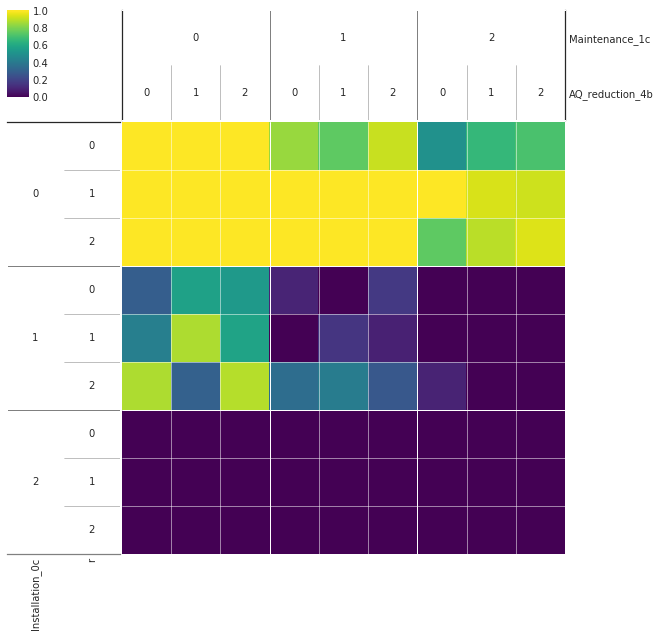

In [60]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes["npv"] > np.percentile(outcomes["npv"], 60)
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

In [14]:
prim_data = pd.read_csv("sample_PRIM_data.csv")
prim_data = prim_data.drop(["Cost or benefit type","Item","Method for monetary value","Country","Related PV panel","Years during which benefit or cost is accounted","u.m.","CBA Time Horizon [years]","Climate","Continent"], axis= 1)

outcomes_prim = np.array(prim_data["npv"])
experiments_prim = prim_data.iloc[:,:-1]
display(experiments_prim)
outcomes_prim

,Related green roof,Season,Building type,Base case roof,Insulation,Roof slope,Cost or benefit scale,Item value,npv,City
0,Extensive green roof,annual average,residential,black roof,any,any,urban,0.100,-7,Lisbon
1,Extensive green roof,annual average,residential,black roof,any,any,urban,0.005,-3,Lisbon
2,Extensive green roof,annual average,residential,black roof,any,any,urban,0.002,0,Lisbon
3,Extensive green roof,annual average,residential,black roof,any,any,urban,0.001,-5,Lisbon
4,Extensive green roof,annual average,residential,black roof,any,any,urban,1.850,4,Lisbon
5,Extensive green roof,annual average,residential,black roof,any,any,urban,0.540,-6,Lisbon
6,Extensive green roof,summer,residential,black roof,insulated,any,building,-0.250,3,Lisbon
7,Extensive green roof,winter,residential,black roof,insulated,any,building,0.060,4,Lisbon
8,Extensive green roof,summer,residential,black roof,non-insulated,any,building,-0.620,8,Lisbon
9,Extensive green roof,winter,residential,black roof,non-insulated,any,building,0.170,5,Lisbon


array([ -7,  -3,   0,  -5,   4,  -6,   3,   4,   8,   5,  -5,  -1,  -9,
       -10,  -7,   8,   6,  -4,   9,   3,   5,   4,  -7,  -7,   6,   7,
        -7,   5,   5,   1,  -2,  -6,  -3,   5,   0,  -7, -10,  -1,   7,
         7,   8,   5,   6], dtype=int64)

In [16]:
prim_data.groupby("City").npv.describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Lisbon,43.0,0.325581,5.931036,-10.0,-5.5,1.0,5.0,9.0


In [8]:
x = experiments_prim
y = outcomes_prim > np.percentile(outcomes_prim, 40)

prim_alg = prim.Prim(x,y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] Related green roof dropped from analysis because only a single category
[MainProcess/INFO] Base case roof dropped from analysis because only a single category
[MainProcess/INFO] 43 points remaining, containing 26 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.2558139534883721, coverage: 0.4230769230769231, density: 1.0 restricted_dimensions: 5


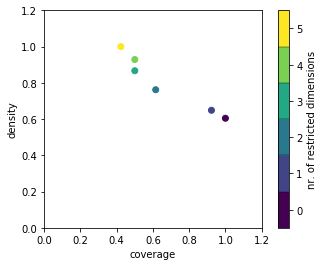

In [9]:
box1.show_tradeoff()
plt.show()

In [10]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.604651,0,1.000000,0.604651,0
1,0.923077,0.648649,1,0.860465,0.648649,1
2,0.615385,0.761905,2,0.488372,0.761905,2
3,0.500000,0.866667,3,0.348837,0.866667,3
4,0.500000,0.928571,4,0.325581,0.928571,4
5,0.423077,1.000000,5,0.255814,1.000000,5


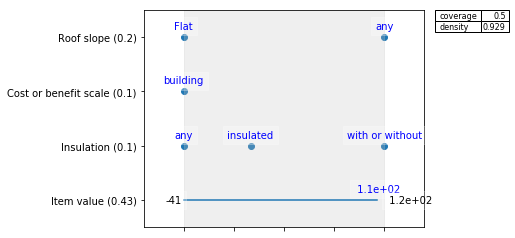

In [12]:
fig = box1.inspect(4,style='graph')
plt.show()

In [98]:
from scipy.optimize import brentq
import math
import random

def lake_problem(
         b = 0.42,          # decay rate for P in lake (0.42 = irreversible)
         q = 2.0,           # recycling exponent
         mean = 0.02,       # mean of natural inflows
         stdev = 0.001,     # future utility discount rate
         delta = 0.98,      # standard deviation of natural inflows
         alpha = 0.4,       # utility from pollution
         nsamples = 100,    # Monte Carlo sampling of natural inflows
         **kwargs):   
    decisions = [kwargs[str(i)] for i in range(100)]          # list of values of the kwargs dictionary passed in as an argument of the function
    Pcrit = brentq(lambda x: x**q/(1+x**q) - b*x, 0.01, 1.5)
    nvars = len(decisions)                                    # 100
    X = np.zeros((nvars,))                                    # nvars-long list of zeros (i.e., a list of 100 zeros)
    average_daily_P = np.zeros((nvars,))
    decisions = np.array(decisions)
    reliability = 0.0

    for _ in range(nsamples):
        X[0] = 0.0
        
        natural_inflows = np.random.lognormal(
                math.log(mean**2 / math.sqrt(stdev**2 + mean**2)),
                math.sqrt(math.log(1.0 + stdev**2 / mean**2)),
                size = nvars)
        
        for t in range(1,nvars):
            X[t] = (1-b)*X[t-1] + X[t-1]**q/(1+X[t-1]**q) + decisions[t-1] +\
                    natural_inflows[t-1]
            average_daily_P[t] += X[t]/float(nsamples)      # so that in the end of the two for loops you will have one array 100-long
                                                            # with mean values across all the "nsamples" replications in each cell. E.g. in the first cell you will have: 
                                                            # X[0]/float(nsamples) of the 1st replication +X[0]/float(nsamples) of the 2nd +...
                                                            # which is equal to: (X[0]+X[0]+...) /float(nsamples) namely the mean value of X[0] 
                                                            # across all the "nsamples" replications (of the first for loop)
    
        reliability += np.sum(X < Pcrit)/float(nsamples*nvars)
      
    max_P = np.max(average_daily_P)
    utility = np.sum(alpha*decisions*np.power(delta,np.arange(nvars)))
    inertia = np.sum(np.absolute(np.diff(decisions)) < 0.02)/float(nvars-1)

    return max_P, utility, inertia, reliability, natural_inflows


# hypothetical input value
d = dict()
for i in range(100):
    d[str(i)] = random.uniform(0, 0.1)
lake_problem(**d)

(2.2193460521614887,
 0.8348013941600216,
 0.3838383838383838,
 0.22000000000000017,
 array([0.01948107, 0.02014735, 0.02131889, 0.02021523, 0.02027722,
        0.02028298, 0.02092349, 0.01946825, 0.02097337, 0.02029256,
        0.02161614, 0.02010935, 0.02134879, 0.02090218, 0.01893416,
        0.01699453, 0.02015453, 0.01969227, 0.01906151, 0.01977837,
        0.02125413, 0.01974961, 0.02053291, 0.01735535, 0.01915057,
        0.0192733 , 0.02153273, 0.01876974, 0.02105178, 0.02012812,
        0.01862157, 0.02046581, 0.02120112, 0.02024256, 0.02012804,
        0.0206706 , 0.02081459, 0.0209788 , 0.01981246, 0.02061721,
        0.02116782, 0.01843854, 0.0213307 , 0.02029735, 0.02097676,
        0.01964973, 0.01999567, 0.0191046 , 0.02021903, 0.02261218,
        0.01969273, 0.02002058, 0.01860365, 0.02111241, 0.02138778,
        0.01944678, 0.01951105, 0.01846367, 0.01900931, 0.01973642,
        0.01861748, 0.02033751, 0.01912471, 0.01992621, 0.01836228,
        0.0214845 , 0.0178968 ,

In [99]:
from ema_workbench import (Model, RealParameter, ScalarOutcome, Constant)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_problem)
lake_model.time_horizon = 100

#specify uncertainties
lake_model.uncertainties = [RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step (these are the decisions, the anthropogenic pollution values, given as input)
lake_model.levers = [RealParameter(str(i), 0, 0.1) for i in 
                     range(lake_model.time_horizon)]

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P', kind=ScalarOutcome.MINIMIZE),
                       ScalarOutcome('utility', kind=ScalarOutcome.MAXIMIZE),
                       ScalarOutcome('inertia', kind=ScalarOutcome.MAXIMIZE),
                       ScalarOutcome('reliability', kind=ScalarOutcome.MAXIMIZE)]

# override some of the defaults of the model
# nsamples controls the number of replications for the stochastic uncertainty
lake_model.constants = [Constant('alpha', 0.41),
                        Constant('nsamples', 150)]

In [100]:
import os

from ema_workbench import (perform_experiments, ema_logging, save_results, 
                           load_results, MultiprocessingEvaluator)
from ema_workbench.em_framework import samplers, util


# turn on logging
ema_logging.log_to_stderr(ema_logging.INFO)

# perform experiments
n_scenarios = 10
n_policies = 1
fn = './{} scenarios {} policies.tar.gz'.format(n_scenarios, n_policies)

try:
    # why regenerate the data?
    results = load_results(fn)
except IOError:
    # generate some random policies by sampling over levers
    counter = util.Counter()
    policies = samplers.sample_levers(lake_model, n_policies, 
                                      sampler=samplers.MonteCarloSampler())
    with SequentialEvaluator(lake_model) as evaluator:
        results = evaluator.perform_experiments(n_scenarios, policies)
    save_results(results, fn)
results

[MainProcess/INFO] results loaded succesfully from C:\Users\Francesco\Documents\GitHub\Photovoltaic_green_roof_energy_communities\10 scenarios 1 policies.tar.gz


(          b     delta      mean         q     stdev         0         1  \
 0  0.204389  0.941750  0.020955  4.361917  0.002673  0.082032  0.078233   
 1  0.276285  0.965144  0.014152  3.112669  0.002175  0.082032  0.078233   
 2  0.390315  0.976930  0.047091  2.864805  0.002468  0.082032  0.078233   
 3  0.332030  0.950890  0.036662  2.465276  0.001779  0.082032  0.078233   
 4  0.232176  0.969066  0.039240  2.123087  0.004175  0.082032  0.078233   
 5  0.353118  0.934352  0.045435  4.179604  0.003249  0.082032  0.078233   
 6  0.129426  0.981181  0.027967  3.341579  0.004787  0.082032  0.078233   
 7  0.269286  0.987079  0.022440  2.632346  0.001362  0.082032  0.078233   
 8  0.167377  0.943467  0.032842  3.842721  0.004281  0.082032  0.078233   
 9  0.434380  0.958054  0.010360  3.738667  0.003497  0.082032  0.078233   
 
          10        11        12  ...        93        94        95        96  \
 0  0.029553  0.010213  0.073879  ...  0.076243  0.048676  0.048349  0.019746   


In [85]:
policies

In [116]:
from ema_workbench.analysis import prim


# we don't want to see the individual levers in these analyses
# so we remove them. 
experiments, outcomes = results
experiments.drop([str(i) for i in range(100)], axis=1)

x = experiments
y = outcomes['max_P'] < 1

prim_alg = prim.Prim(x,y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10 points remaining, containing 2 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.2, coverage: 1.0, density: 1.0 restricted_dimensions: 2


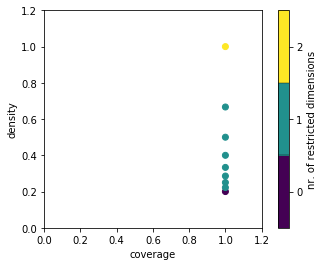

In [118]:
box1.show_tradeoff()
plt.show()

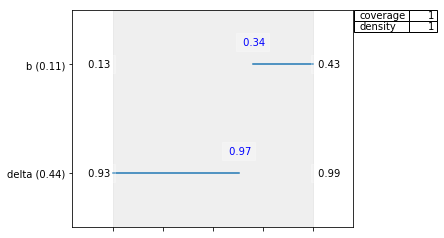

In [120]:
fig = box1.inspect(style='graph')
plt.show()